# Film By The Numbers
## Intro
### Topics Covered:
* How films have changed overtime with respect to budget, revenue, and net income
* How runtime affects a film's success
* Who are the highest revenue earning directors


In [35]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.ticker import AutoMinorLocator
from matplotlib import gridspec

### Create Main Data Frame

In [36]:
df_main = pd.read_csv('tmdb-movies.csv')
df_main.info()
df_main.revenue_adj.value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

revenue_adj
0.000000e+00    6016
1.177534e+08       2
1.438914e+07       2
1.000000e+06       2
2.910640e+07       2
                ... 
2.043403e+07       1
6.497291e+06       1
8.160074e+07       1
1.186042e+08       1
8.061618e+07       1
Name: count, Length: 4840, dtype: int64

## Cleaning Data


### No Budget, No Revenue?
#### When observing the value counts of our revenue_adj and budget_adj columns we see a large number of rows hold 0. This is most likely caused by missing data.

In [37]:
df_main.revenue_adj.value_counts()

revenue_adj
0.000000e+00    6016
1.177534e+08       2
1.438914e+07       2
1.000000e+06       2
2.910640e+07       2
                ... 
2.043403e+07       1
6.497291e+06       1
8.160074e+07       1
1.186042e+08       1
8.061618e+07       1
Name: count, Length: 4840, dtype: int64

In [38]:
df_main.budget_adj.value_counts()

budget_adj
0.000000e+00    5696
1.016400e+07      17
2.103337e+07      17
2.000000e+07      16
4.605455e+06      15
                ... 
1.062090e+08       1
3.347892e+07       1
3.665348e+07       1
2.225390e+06       1
1.276423e+05       1
Name: count, Length: 2614, dtype: int64

#### We will set these values as NaN to avoid contamination of our results.

In [39]:
# Function to replace 0 with null
def replace_0_with_null(columns):
    for c in columns:
        df_main[c].replace(0, np.nan, inplace=True)

#### We'll also swap the 0s for NaN in the revenue, budget, vote_count, vote_average, and popularity with the revenue_adj and budget_adj columns

In [40]:
# Replace all 0 values in the following columns
columns = ['revenue', 'budget', 'vote_count', 'vote_average', 'revenue_adj', 'budget_adj']
replace_0_with_null(columns)

### Runtime
#### Upon investigating runtime, serveral 0s were found along with a lot of runtimes that were less than 80 minutes. The Screen Actors Guild defines a feature length film as 80 minutes in length. 
##### https://www.studiobinder.com/blog/what-is-a-feature-film-definition/#:~:text=The%20Screen%20Actors%20Guild%20defines,film%20or%20a%20feature%20film.

In [41]:
df_main.loc[df_main.runtime < 80].count()

id                      748
imdb_id                 742
popularity              748
budget                  123
revenue                  70
original_title          748
cast                    707
homepage                215
director                719
tagline                 311
keywords                536
overview                745
runtime                 748
genres                  736
production_companies    563
release_date            748
vote_count              748
vote_average            748
release_year            748
budget_adj              123
revenue_adj              70
dtype: int64

#### 748 films fall short of this criteria. There are several different length requirements of feature films provided by different organizations. For our purposes we will use the screen actors guild's definition of 80 minutes.


In [42]:
df_main = df_main[df_main.runtime >= 80]
df_main.runtime.sort_values(ascending=True)

10864     80
8237      80
555       80
10723     80
5980      80
        ... 
6181     561
6176     566
2722     705
4041     877
3894     900
Name: runtime, Length: 10118, dtype: int64

## Question 1: How have budget and revenue changed over the time period covered by the dataset?

In [43]:
# Add net income to df_main
df_main['net_income_adj'] = df_main['revenue_adj'] - df_main['budget_adj']

# Create new data frame
df_years = df_main[['release_year', 'id', 'runtime', 'vote_average', 'budget_adj', 'revenue_adj', 'net_income_adj']]

# Group new data frame by yearly averages
group_avg_years = df_years.groupby(['release_year']).mean()

# Group new data frame by totals
group_total_years = df_years.groupby(['release_year']).sum()

# Group new data frame by count
group_count_years = df_years.groupby(['release_year']).count()

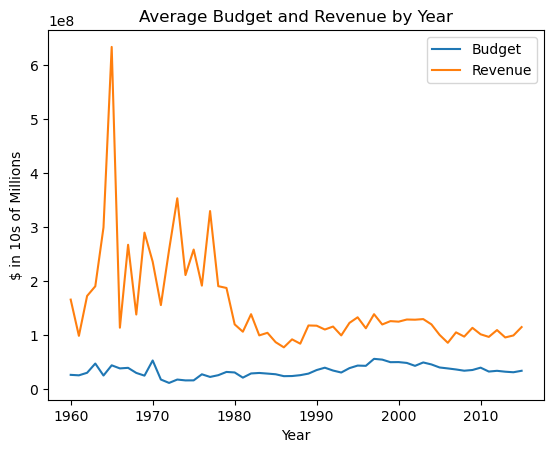

In [44]:
# Plot average budget and revenue by years
plt.plot(group_avg_years['budget_adj']);
plt.plot(group_avg_years['revenue_adj']);
plt.title('Average Budget and Revenue by Year');
plt.xlabel('Year');
plt.ylabel('$ in 10s of Millions');
plt.legend(['Budget', 'Revenue']);

#### When we control for inflation we see that on average the revenue made has decreased and steadied out while budget has remained relatively consistent.
#### If a film on average makes less money, would less films be made?

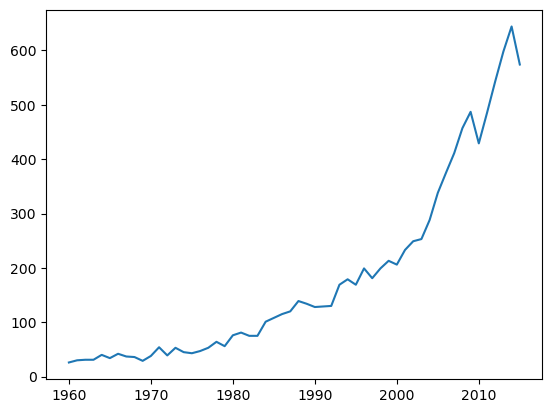

In [45]:
# Plot count of films by year
plt.plot(group_count_years['id']);

#### Obviously not, more films are produced in later years than earlier.
#### Let's observe how the films industry is doing as a whole by comparing the yearly totals.

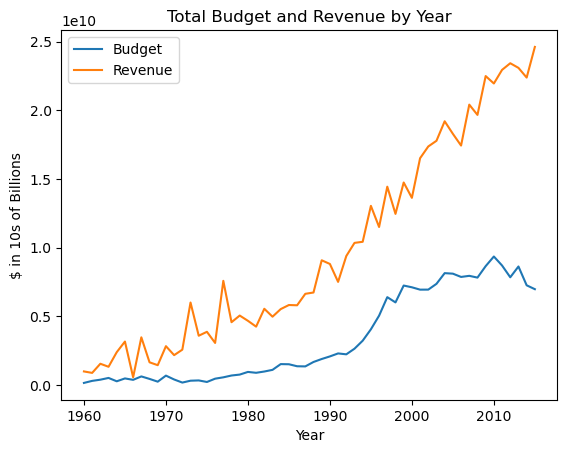

In [46]:
# Plot total budget and revenue by year
plt.plot(group_total_years['budget_adj']);
plt.plot(group_total_years['revenue_adj']);
plt.title('Total Budget and Revenue by Year');
plt.xlabel('Year');
plt.ylabel('$ in 10s of Billions');
plt.legend(['Budget', 'Revenue']);

### Q1 Conclusion
#### The film industry as a whole is doing better in later years. While films on average have declined in revenue, the amount of options for movie-goers has increased and the money made by the film industry has increased.

## Question 2: How has net income changed over time?

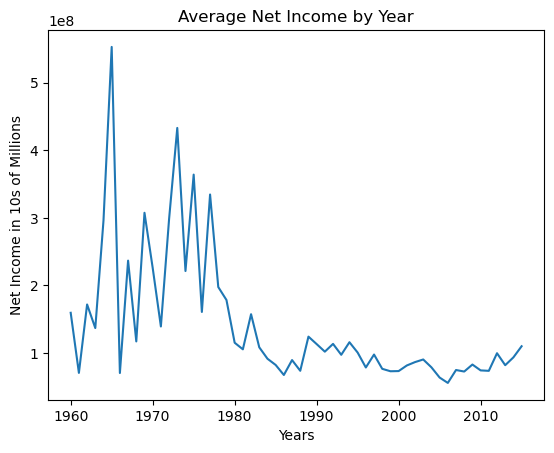

In [47]:
# Plot net income by year
plt.plot(group_avg_years['net_income_adj']);
plt.title('Average Net Income by Year');
plt.xlabel('Years');
plt.ylabel('Net Income in 10s of Millions');

#### Net income on average has declined and remained consistent in later years.
#### Let's observe total net income.

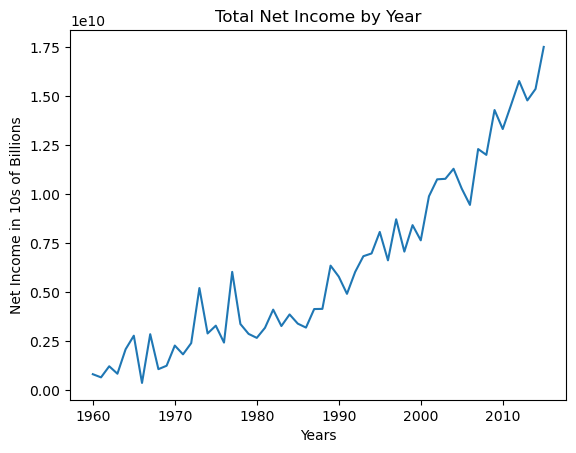

In [48]:
plt.plot(group_total_years['net_income_adj'])
plt.title('Total Net Income by Year');
plt.xlabel('Years');
plt.ylabel('Net Income in 10s of Billions');

#### Net income seems to follow a similar path to revenue. This could suggest that budget has less of an effect than revenue on net income.

### Q2 Conclusion
#### Net income appears to follow a similar patter to revenue over the time period. This could suggest that revenue drives net income over budget.

## Question 3: What are the distributions of revenue, budget, and net income?

In [49]:
# Histogram function that displays y-values on bars
def histogram(column, title, xlabel, ylabel):
    counts, edges, bars = plt.hist(df_main[column])
    plt.bar_label(bars)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

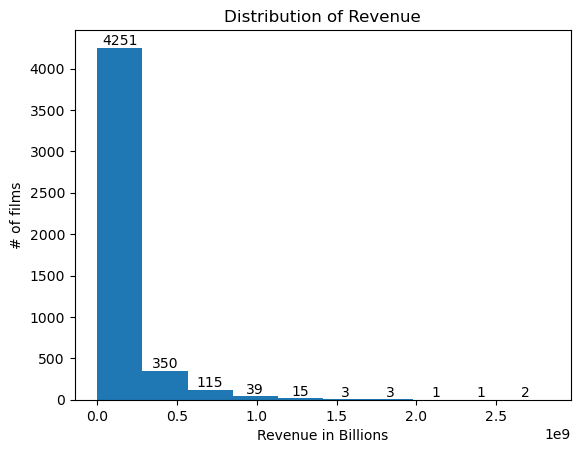

In [50]:
# Revenue Histogram
histogram('revenue_adj', 'Distribution of Revenue', 'Revenue in Billions', '# of films')

#### The vast majority of films make less than half a billion in revenue

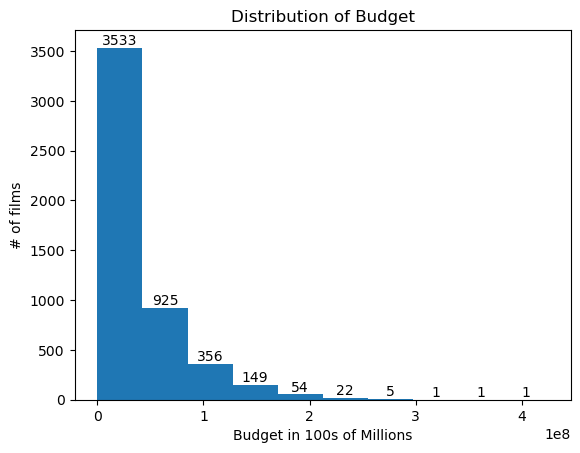

In [51]:
# Budget Histogram
histogram('budget_adj', 'Distribution of Budget', 'Budget in 100s of Millions', '# of films')

#### The vast majority of films spend less than 100 million on budget

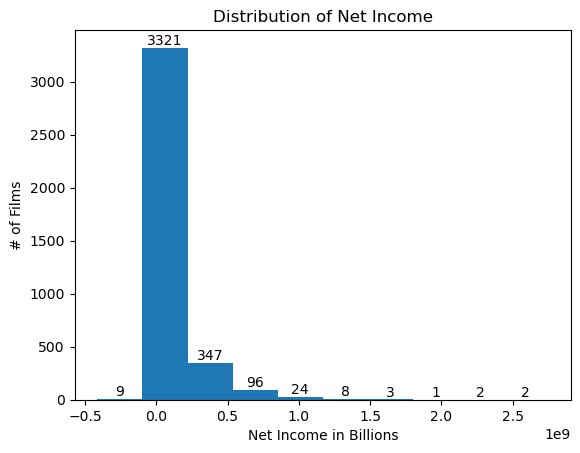

In [52]:
histogram('net_income_adj', 'Distribution of Net Income', 'Net Income in Billions', '# of Films')


#### The vast majority of films sit between 0 and 500 million in net income

### Q3 Conclusion
#### The distributions of revenue, budget, and net income are heavily skewed right.

## Question 4: What is the relationship between budget and revenue? Budget and net income? Revenue and net income?

In [53]:

# Scatter plot with trendline function
def scatter_plot_with_trendline(x, y, title, xlabel, ylabel):
    # Create new Dataframe that drops all null values from the x and y columns.
    # This will allow for the calculation of a trendline
    df_relations = df_main.dropna(subset=[x, y])
    nx = df_relations[x]
    ny = df_relations[y]
    # Create Scatter Plot
    plt.scatter(nx, ny)
    # Calculate Trendline
    z = np.polyfit(nx, ny, 1)
    p = np.poly1d(z)
    # Plot Trendline
    plt.plot(nx, p(nx))
    # Add title and labels
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

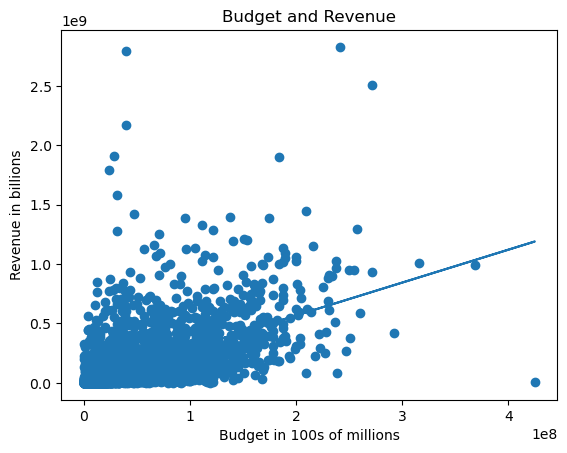

In [54]:
x = 'budget_adj'
y = 'revenue_adj'
title = 'Budget and Revenue'
xlabel = 'Budget in 100s of millions'
ylabel = 'Revenue in billions'
scatter_plot_with_trendline(x, y, title, xlabel, ylabel)


### There is a correlation between budget and revenue, however it is not very strong

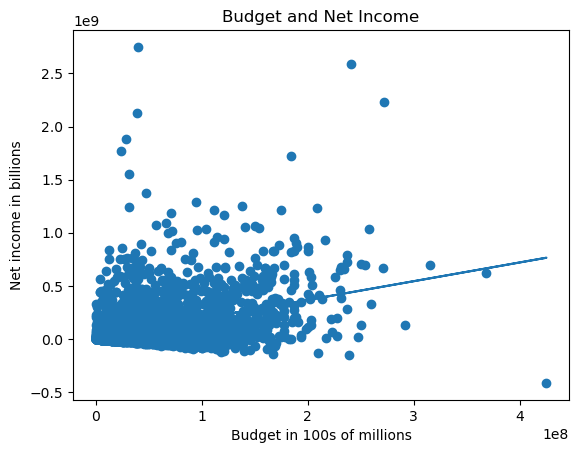

In [55]:
x = 'budget_adj'
y = 'net_income_adj'
title = 'Budget and Net Income'
xlabel = 'Budget in 100s of millions'
ylabel = 'Net income in billions'
scatter_plot_with_trendline(x, y, title, xlabel, ylabel)

### The correlation between budget and net income is weaker than budget and revenue

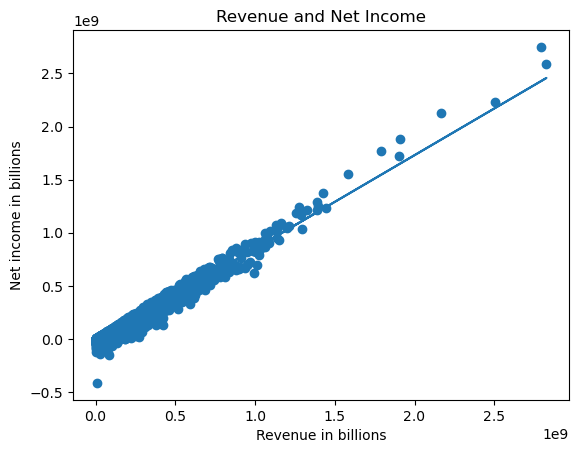

In [56]:
x = 'revenue_adj'
y = 'net_income_adj'
title = 'Revenue and Net Income'
xlabel = 'Revenue in billions'
ylabel = 'Net income in billions'
scatter_plot_with_trendline(x, y, title, xlabel, ylabel)

### The correlation between revenue and net income is by far the strongest.

### Q4 Conclusion
#### The data suggests that a film's financial success is not based on the budget but other factors (i.e. marketing, quality, actors, director, genre, etc.)

## Question 5: How does runtime affect a film's performance?

#### Do longer films cost more to make?

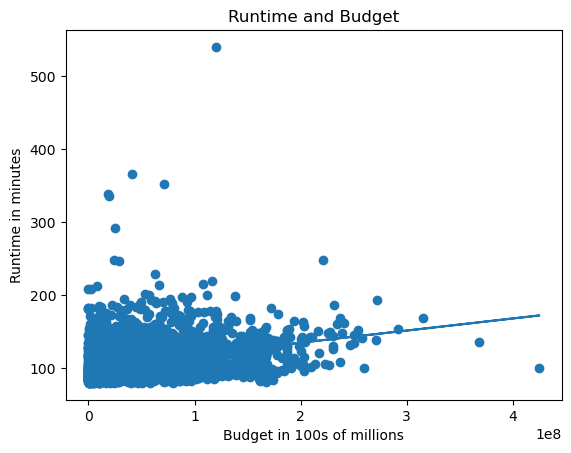

In [57]:
x = 'budget_adj'
y = 'runtime'
title = 'Runtime and Budget'
xlabel = 'Budget in 100s of millions'
ylabel = 'Runtime in minutes'
scatter_plot_with_trendline(x, y, title, xlabel, ylabel)

#### There is not a strong correlation between budget and runtime.

#### Do longer films make more or less money?

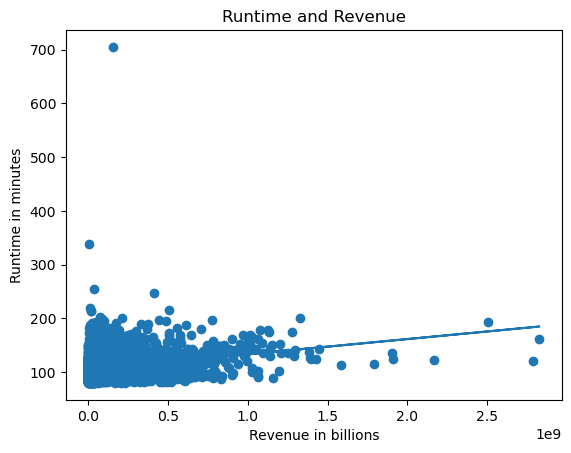

In [58]:
x = 'revenue_adj'
y = 'runtime'
title = 'Runtime and Revenue'
xlabel = 'Revenue in billions'
ylabel = 'Runtime in minutes'
scatter_plot_with_trendline(x, y, title, xlabel, ylabel)

#### No strong correlation.

#### Do longer or short films receive higher ratings?

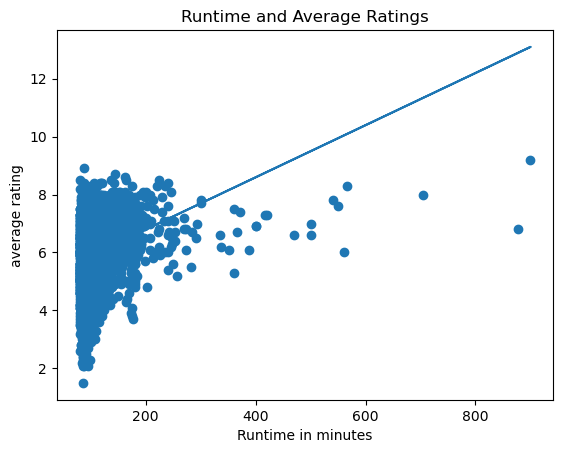

In [59]:
x = 'runtime'
y = 'vote_average'
title = 'Runtime and Average Ratings'
xlabel = 'Runtime in minutes'
ylabel = 'average rating'
scatter_plot_with_trendline(x, y, title, xlabel, ylabel)

### There is some correlation to suggest that longer movies are better rated.

### Q5 Conclusion
#### The effect runtime has on a film seems to matter most when it come to ratings. It could mean that better rated films tend to be longer, than longer films tend to be better rated.

## Question 6: Do movie-goers care most about quality?

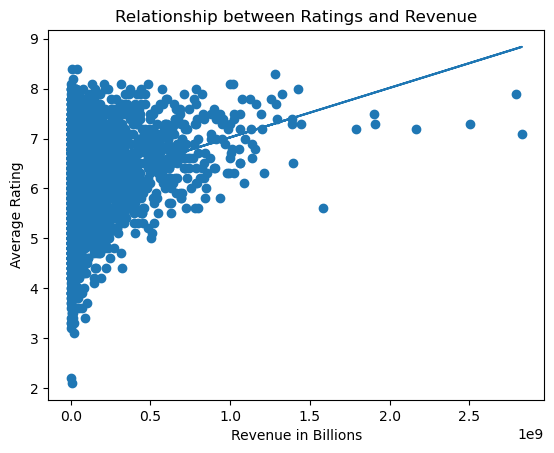

In [60]:
x = 'revenue_adj'
y = 'vote_average'
title = 'Relationship between Ratings and Revenue'
xlabel = 'Revenue in Billions'
ylabel = 'Average Rating'
scatter_plot_with_trendline(x, y, title, xlabel, ylabel)

#### Some correlation, not the strongest

#### Do better rated films cost more to make?

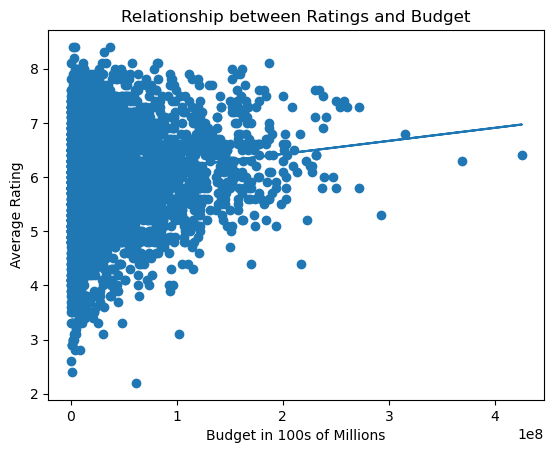

In [61]:
x = 'budget_adj'
y = 'vote_average'
title = 'Relationship between Ratings and Budget'
xlabel = 'Budget in 100s of Millions'
ylabel = 'Average Rating'
scatter_plot_with_trendline(x, y, title, xlabel, ylabel)

#### Not a strong correlation

#### How have ratings changed overtime?

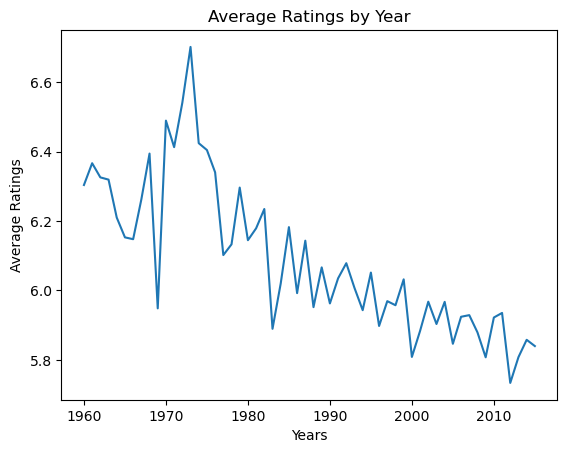

In [62]:
plt.plot(group_avg_years['vote_average']);
plt.title('Average Ratings by Year');
plt.xlabel('Years');
plt.ylabel('Average Ratings');

#### Ouch! Average ratings for movies are plummeting over time.
#### How reliable are ratings as a metric? Let's look at the distribution of ratings and distribution of vote counts.

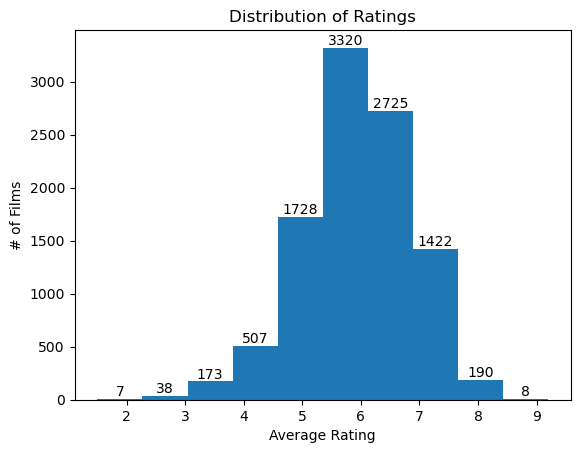

In [67]:
histogram('vote_average', 'Distribution of Ratings', 'Average Rating', '# of Films')

#### We see the ratings are more bell-shaped in their distribution.

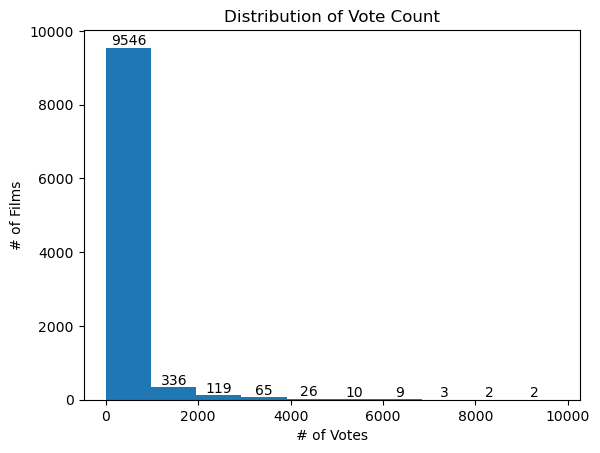

In [68]:
histogram('vote_count', 'Distribution of Vote Count', '# of Votes', '# of Films')

#### As we see here the votes cast for movies skews heavily right. Film ratings are determined by little votes compared to the income they bring in.

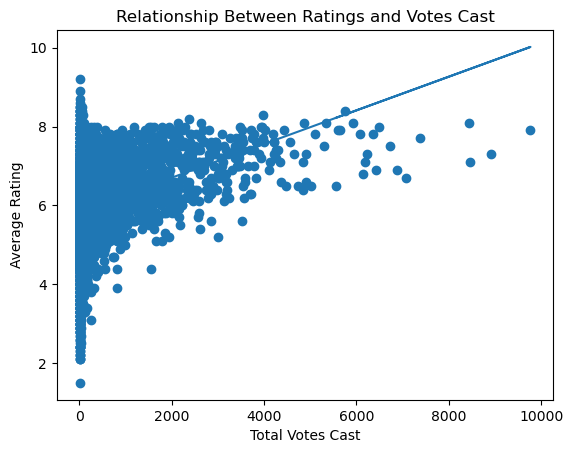

In [65]:
scatter_plot_with_trendline('vote_count', 'vote_average', 'Relationship Between Ratings and Votes Cast', 'Total Votes Cast', 'Average Rating')

#### There is a positive correlation between a movies ratings and number of votes cast.

### Q6 Conclusion
#### More movies have been made and people are paying more for them than in the past, but average ratings have gone down. This could suggest that your average movie-goer cares more for quantity and not quality, but I disagree. While it can be easy to take ratings at face value, they are determined by a small amount of people. Separating those who watch but do not rate movies, and those who watch and rate is important. If the sample size of ratings was more proportional to the revenue films make, then I would be more inclined to believe the ratings.

## Question 7: Who are the top 10 directors by total revenue?

<Axes: title={'center': 'Top 10 Directors by Total Revenue'}, xlabel='Total revenue in 10s of billions', ylabel='Director'>

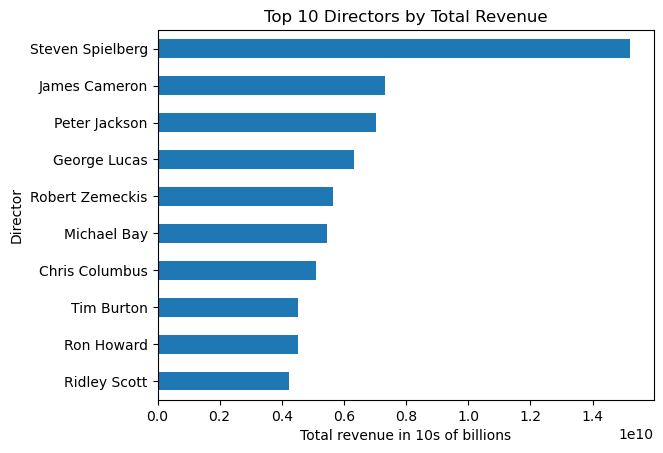

In [69]:
top_rev_directors = df_main.groupby('director')['revenue_adj'].sum().nlargest(10).sort_values()
top_rev_directors.plot(kind='barh',ylabel="Director", xlabel="Total revenue in 10s of billions", title="Top 10 Directors by Total Revenue")

### Steven Spielberg brings in the most revenue

## Conclusion
* Budget is not the key driver of revenue and net income. It doesn't matter how much you spend on the film, other factors contribute more to your films financial success.
* Average income per film has fallen from where it was in the past. However, income for the film industry as a whole has increased. The film industry has evolved to where the supply of options has increased to meet the total demand.
* Average ratings have dropped for films. I do not believe this is a fair statement for newer films. I believe the ratings are flawed due to a very low sample size. Ratings are also flawed in the sense that if one person rates a film a 10 and 50 people rate a film on average a 7. We cannot determine if the film rated 10 is actually better than the film rated 7 because their sample sizes differ so much.
* Finally when it comes to success among directors we see Steven Spielberg holds a commanding lead with almost double James Cameron in second place.
